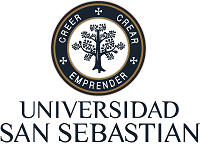

# Magíster en Data Science
## Curso: Machine Learning Avanzado
## Trabajo Individual 1
## Diego Miranda Olavarría
* El siguiente trabajo tiene como objetivo construir 2 modelos de regresión. Por un lado un árbol de Regresión y por otro lado una Red Neuronal, para predecir la velocidad en 44 pórticos de TAG, con la intención de anticiparse a fechas en las cuales la operación de las autopistas se pueda ver afectada.
Para ello se indica una partición de los datos en donde un 65% corresponden a entrenamiento, 15% a validación y 10% a prueba.
Una vez creado los 2 modelos se pide ajustar la cantidad de neuronas en el modelo de Red Neuronal y comparar los 3 modelos para determinar el que tenga mejor rendimiento.

In [1]:
import pandas as pd

data = pd.read_csv("velocidades.csv")

data.head()

,Unnamed: 0,Fecha,Horas,Agno,Mes,Dia_mes,Dia_sem,fest,20,21,...,58,59,60,61,62,64,65,66,67,68
0,1,1/1/2015,6,2015,1,1,4,1,76.967742,65.548387,...,64.645161,46.612903,89.967742,83.451613,90.645161,85.838710,85.612903,88.258065,85.709677,85.096774
1,2,1/1/2015,7,2015,1,1,4,1,70.451613,66.467742,...,56.661290,48.806452,75.209677,79.758065,68.161290,83.096774,81.048387,78.370968,73.306452,70.129032
2,3,1/1/2015,8,2015,1,1,4,1,77.903226,47.193548,...,59.000000,46.709677,72.741935,71.161290,65.096774,81.870968,79.225806,77.000000,70.419355,56.548387
3,4,1/1/2015,9,2015,1,1,4,1,70.806452,48.338710,...,54.758065,49.000000,75.612903,78.741935,79.419355,84.741935,80.419355,83.516129,75.741935,65.774194
4,5,1/1/2015,10,2015,1,1,4,1,68.451613,50.924731,...,50.473118,55.290323,75.645161,81.612903,75.064516,85.870968,80.838710,83.709677,77.677419,66.322581


In [2]:
# Explorando filas para la detección de NaN y Outliers

data.head(20)

,Unnamed: 0,Fecha,Horas,Agno,Mes,Dia_mes,Dia_sem,fest,20,21,...,58,59,60,61,62,64,65,66,67,68
0,1,1/1/2015,6,2015,1,1,4,1,76.967742,65.548387,...,64.645161,46.612903,89.967742,83.451613,90.645161,85.838710,85.612903,88.258065,85.709677,85.096774
1,2,1/1/2015,7,2015,1,1,4,1,70.451613,66.467742,...,56.661290,48.806452,75.209677,79.758065,68.161290,83.096774,81.048387,78.370968,73.306452,70.129032
2,3,1/1/2015,8,2015,1,1,4,1,77.903226,47.193548,...,59.000000,46.709677,72.741935,71.161290,65.096774,81.870968,79.225806,77.000000,70.419355,56.548387
3,4,1/1/2015,9,2015,1,1,4,1,70.806452,48.338710,...,54.758065,49.000000,75.612903,78.741935,79.419355,84.741935,80.419355,83.516129,75.741935,65.774194
4,5,1/1/2015,10,2015,1,1,4,1,68.451613,50.924731,...,50.473118,55.290323,75.645161,81.612903,75.064516,85.870968,80.838710,83.709677,77.677419,66.322581
5,6,1/1/2015,11,2015,1,1,4,1,70.548387,50.129032,...,42.548387,40.548387,69.548387,74.193548,74.370968,76.983871,84.467742,86.241935,76.661290,63.387097
6,7,1/1/2015,12,2015,1,1,4,1,61.741935,52.967742,...,47.774194,52.596774,74.935484,79.483871,69.903226,82.870968,76.758065,80.500000,79.290323,53.322581
7,8,1/1/2015,13,2015,1,1,4,1,76.903226,56.774194,...,43.741935,45.709677,56.580645,79.419355,79.935484,87.225806,87.354839,84.129032,82.612903,69.322581
8,9,1/1/2015,14,2015,1,1,4,1,73.258065,51.758065,...,47.741935,45.080645,78.241935,88.080645,77.677419,84.854839,83.161290,87.806452,81.483871,67.258065
9,10,1/1/2015,15,2015,1,1,4,1,69.677419,48.564516,...,44.790323,31.709677,72.790323,75.032258,74.177419,75.000000,74.290323,80.145161,85.580645,65.838710


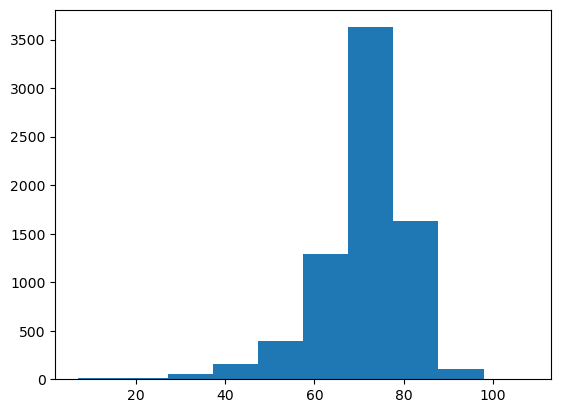

In [3]:
# Explorando la posiblidad de que existan outliers en el dataframe

import matplotlib.pyplot as plt

plt.hist(data["20"])

plt.show()

### 1.- Generando la partición de los datos en: 65% train, 15% validación y 20% test

In [4]:
from sklearn.model_selection import train_test_split

X = data[["Horas","Agno","Mes","Dia_mes","Dia_sem","fest"]] # Columnas de fechas
y = data.iloc[:, 8:53] # Columnas de pórticos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Estandarizar 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores


# Calcular el tamaño total de los conjuntos
total_train = len(X_train)
total_val = len(X_val)
total_test = len(X_test)

train = (total_train / (total_train + total_val + total_test)) * 100
val = (total_val / (total_train + total_val + total_test)) * 100
test = (total_test / (total_train + total_val + total_test)) * 100


print(f"Porcentaje de entrenamiento: {train:.2f}%")
print(f"Porcentaje de validación: {val:.2f}%")
print(f"Porcentaje de prueba: {test:.2f}%")

Porcentaje de entrenamiento: 63.98%
Porcentaje de validación: 16.01%
Porcentaje de prueba: 20.01%


In [5]:
# corroborando la partición de los conjuntos

y

,20,21,22,23,24,25,26,27,28,29,...,58,59,60,61,62,64,65,66,67,68
0,76.967742,65.548387,59.419355,60.258065,78.338710,80.104839,83.225806,80.612903,89.258065,77.500000,...,64.645161,46.612903,89.967742,83.451613,90.645161,85.838710,85.612903,88.258065,85.709677,85.096774
1,70.451613,66.467742,35.903226,48.403226,50.145161,66.403226,72.145161,68.225806,70.709677,68.677419,...,56.661290,48.806452,75.209677,79.758065,68.161290,83.096774,81.048387,78.370968,73.306452,70.129032
2,77.903226,47.193548,26.451613,33.419355,39.629032,42.419355,49.177419,51.419355,43.387097,47.725806,...,59.000000,46.709677,72.741935,71.161290,65.096774,81.870968,79.225806,77.000000,70.419355,56.548387
3,70.806452,48.338710,32.693548,43.193548,59.338710,68.822581,67.854839,58.290323,73.258065,67.354839,...,54.758065,49.000000,75.612903,78.741935,79.419355,84.741935,80.419355,83.516129,75.741935,65.774194
4,68.451613,50.924731,25.129032,44.516129,52.150538,75.354839,78.677419,73.440860,79.666667,76.956989,...,50.473118,55.290323,75.645161,81.612903,75.064516,85.870968,80.838710,83.709677,77.677419,66.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,12.000000,38.500000,22.500000,25.000000,36.500000,47.500000,50.000000,44.500000,86.000000,70.000000,...,61.500000,38.000000,58.000000,55.000000,21.500000,25.500000,36.000000,45.500000,33.000000,38.500000
7304,49.500000,44.000000,24.000000,35.500000,48.000000,76.000000,82.000000,77.000000,83.500000,80.000000,...,28.000000,42.000000,60.000000,30.000000,88.000000,89.000000,86.500000,84.000000,90.000000,90.000000
7305,30.000000,54.000000,25.000000,58.500000,51.500000,90.000000,83.000000,83.000000,86.000000,87.000000,...,41.000000,48.000000,81.000000,72.000000,77.000000,71.000000,79.000000,74.000000,72.000000,77.000000
7306,38.000000,38.000000,27.000000,15.000000,39.000000,6.000000,31.000000,58.000000,85.000000,74.000000,...,26.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000


In [6]:
# Corroborando la partición de los conjuntos

X

,Horas,Agno,Mes,Dia_mes,Dia_sem,fest
0,6,2015,1,1,4,1
1,7,2015,1,1,4,1
2,8,2015,1,1,4,1
3,9,2015,1,1,4,1
4,10,2015,1,1,4,1
...,...,...,...,...,...,...
7303,15,2016,12,30,5,1
7304,16,2016,12,30,5,1
7305,17,2016,12,30,5,1
7306,18,2016,12,30,5,1


### 2.- Construir un modelo de Árbol de Regresión

In [7]:
from sklearn.tree import DecisionTreeRegressor

regression_models = []

# Entrenar un árbol de regresión para cada variable objetivo
for i in range(y_train.shape[1]):
    arbol = DecisionTreeRegressor(max_depth=5, min_samples_split=2) # Ajuste de Hiperparámetros
    y_train_single = y_train.iloc[:, i]
    arbol.fit(X_train, y_train_single)
    regression_models.append(arbol)

y_pred = []
for model in regression_models:
    y_pred.append(model.predict(X_test))


# Colocar las predicciones en una tabla
import numpy as np

y_pred_arbol = np.column_stack(y_pred)

y_pred_df = pd.DataFrame(y_pred_arbol)

print(y_pred_df)


from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred_df)
print("-------------------------------------------------")
print("El MSE del modelo es: ", test_mse)

             0          1          2          3          4          5   \
0     72.711984  51.513685  29.785112  40.632304  49.797191  72.294397   
1     73.948006  60.546050  40.755449  47.436679  53.321429  74.312772   
2     70.178808  37.882940  26.411838  40.632304  49.797191  56.532775   
3     70.136588  52.529644  36.740829  40.918367  45.982925  49.046512   
4     86.166667  64.660589  44.983560  56.083333  68.902439  79.614912   
...         ...        ...        ...        ...        ...        ...   
1457  72.711984  54.577340  30.319327  46.189891  53.353447  72.294397   
1458  72.711984  54.577340  32.616419  49.454167  53.353447  72.669083   
1459  70.819704  51.915020  30.606538  49.454167  55.718601  75.259476   
1460  70.178808  37.882940  26.411838  40.632304  49.797191  56.532775   
1461  68.617886  51.513685  29.785112  40.632304  49.797191  66.550268   

             6          7          8          9   ...         34         35  \
0     77.455372  76.340420  79.7

In [8]:
mse = mean_squared_error(y_test, y_pred_df, multioutput='raw_values')
print("El MSE por cada columna es: ")
for i, mse_value in enumerate(mse):
    print(f"MSE Columna {i+20}: {mse_value}")

El MSE por cada columna es: 
MSE Columna 20: 99.68348904046589
MSE Columna 21: 80.66214371872698
MSE Columna 22: 80.09363439389406
MSE Columna 23: 80.07254184838881
MSE Columna 24: 104.71543073803181
MSE Columna 25: 266.28004197738125
MSE Columna 26: 119.93127203645682
MSE Columna 27: 195.4845658600337
MSE Columna 28: 191.50544589254793
MSE Columna 29: 151.01170874026744
MSE Columna 30: 169.1118670155926
MSE Columna 31: 137.37438323768535
MSE Columna 32: 145.76788174486396
MSE Columna 33: 100.29324169567002
MSE Columna 34: 135.09287970292326
MSE Columna 35: 180.46320591243025
MSE Columna 36: 168.82057368276924
MSE Columna 37: 202.71309277368798
MSE Columna 38: 101.23070886153515
MSE Columna 39: 154.44509681742585
MSE Columna 40: 216.90903845286653
MSE Columna 41: 152.3073446586146
MSE Columna 42: 134.00700272035976
MSE Columna 43: 255.43787706692657
MSE Columna 44: 156.28493101812165
MSE Columna 45: 220.27161825697766
MSE Columna 46: 152.96179636942975
MSE Columna 47: 92.9591346213644


### 3.- Construir un modelo de Red Neuronal

In [9]:
# Crear el modelo de red neuronal

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 10 neuronas, esto debido a que llega un momento en que el MSE no disminuye más. 
model.add(Dense(44))  # Capa de salida con 44 neuronas, equivalente a las variables de entrada

# Compilar el modelo mediante la función de pérdida 'mean_squared_error', esto debido
# a que el MSE es el parámetro para determinar el rendimiento de los modelos de regresión utilizados para este caso.
# Para ajustar los pesos se utiliza en este caso el optimizador 'adam', esto debido a que es común en los casos de regresión 
# y se adapta automáticamente a la tasa de aprendizaje.

model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

mse = model.evaluate(X_test, y_test)
print("El MSE del modelo Red Neuronal es:", mse)

Epoch 1/200
147/147 [==============================] - 1s 1ms/step - loss: 4491.8960
Epoch 2/200
147/147 [==============================] - 0s 1ms/step - loss: 4297.0532
Epoch 3/200
147/147 [==============================] - 0s 1ms/step - loss: 3959.1797
Epoch 4/200
147/147 [==============================] - 0s 1ms/step - loss: 3507.6387
Epoch 5/200
147/147 [==============================] - 0s 1ms/step - loss: 2989.4631
Epoch 6/200
147/147 [==============================] - 0s 1ms/step - loss: 2452.4575
Epoch 7/200
147/147 [==============================] - 0s 1ms/step - loss: 1941.9207
Epoch 8/200
147/147 [==============================] - 0s 1ms/step - loss: 1491.4010
Epoch 9/200
147/147 [==============================] - 0s 1ms/step - loss: 1119.3651
Epoch 10/200
147/147 [==============================] - 0s 1ms/step - loss: 831.5989
Epoch 11/200
147/147 [==============================] - 0s 1ms/step - loss: 622.9493
Epoch 12/200
147/147 [==============================] - 0s 1ms/st

147/147 [==============================] - 0s 1ms/step - loss: 191.0114
Epoch 193/200
147/147 [==============================] - 0s 1ms/step - loss: 190.9941
Epoch 194/200
147/147 [==============================] - 0s 1ms/step - loss: 190.9700
Epoch 195/200
147/147 [==============================] - 0s 1ms/step - loss: 191.0109
Epoch 196/200
147/147 [==============================] - 0s 1ms/step - loss: 190.9828
Epoch 197/200
147/147 [==============================] - 0s 1ms/step - loss: 191.0006
Epoch 198/200
147/147 [==============================] - 0s 1ms/step - loss: 190.9628
Epoch 199/200
147/147 [==============================] - 0s 1ms/step - loss: 190.9556
Epoch 200/200
46/46 [==============================] - 0s 1ms/step - loss: 189.5417
El MSE del modelo Red Neuronal es: 189.5417022705078


### 4.- Variando las características de la Red Neuronal con keras-tuner

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch



class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
    
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16),
                               activation='relu', input_shape=self.input_shape))
        
        for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
            model.add(layers.Dense(units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
                                   activation='relu'))
        
        model.add(layers.Dense(self.num_classes))  # Capa de salida con 44 neuronas (igual al número de variables objetivo)
        
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

hypermodel = MyHyperModel(input_shape=X_train.shape[1:], num_classes=44)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    directory='my_dir',
    project_name='my_project'
)

tuner.search(X_train, y_train, epochs=500, validation_data=(X_test, y_test))


best_model = tuner.get_best_models(num_models=1)[0]


y_pred_rn = best_model.predict(X_test)
mse_model = mean_squared_error(y_test, y_pred_rn)
print("MSE del modelo:", mse_model)


Trial 10 Complete [00h 02m 35s]
val_loss: 150.02694702148438

Best val_loss So Far: 149.88075256347656
Total elapsed time: 00h 10m 49s
INFO:tensorflow:Oracle triggered exit
46/46 [==============================] - 0s 1ms/step
MSE del modelo: 149.8807518550598


### 5.- Comparación de los 3 modelos
* Los modelos utilizados para el modelo de regresión:
-  Árbol de Regresión, en el cuál se determinó un máximo de profundidad de 5 para evitar sobreajustes.
- Red Neuronal, con capa oculta con 10 neuronas, esto debido a que llega un momento en que el MSE no disminuye más. Se compiló el modelo mediante la función de pérdida 'mean_squared_error', esto debido
a que el MSE es el parámetro para determinar el rendimiento de los modelos de regresión utilizados para este caso.Para ajustar los pesos se utiliza en este caso el optimizador 'adam', esto debido a que es común en los casos de regresión y se adapta automáticamente a la tasa de aprendizaje.
- Red Neuronal utilizando Keras-Tuner, en el cual se pide variar las capas ocultas y su cantidad de neuronas de 16 a 128. En este modelo al igual que la Red Nueronal se utilizaron 500 epoch.

In [11]:
# Resultados en una tabla

from tabulate import tabulate

table = [
    ["Árbol de regresión", test_mse],
    ["Red Neuronal", mse],
    ["Red Neuronal Keras-Tuner", mse_model]
]

headers = ["Algoritmo","Error Cuadrático Medio"]


print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════════════════════╤══════════════════════════╕
│ Algoritmo                │   Error Cuadrático Medio │
╞══════════════════════════╪══════════════════════════╡
│ Árbol de regresión       │                  154.226 │
├──────────────────────────┼──────────────────────────┤
│ Red Neuronal             │                  189.542 │
├──────────────────────────┼──────────────────────────┤
│ Red Neuronal Keras-Tuner │                  149.881 │
╘══════════════════════════╧══════════════════════════╛


### Conclusión
* Si comparamos los 3 modelos mediante su Error Cuadrático Medio, el modelo de Red Neuronal Keras-Tuner es la que tiene mejor rendimiento, pero hay que tomar en cuenta que se utilizaron 500 epoch para su modelamiento, lo que se traduce en un mayor utilización de recursos y riesgo de caer en sobreajuste.